In [343]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [344]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [345]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func , inspect

In [346]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [347]:
# reflect an existing database into a new model

# reflect the tables
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [243]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [348]:
# Save references to each table

#Measurement = Base.classes['measurement']
#Station = Base.classes['station']
# Assign the dow class to a variable called `Dow`
Station = Base.classes.station
Measurement= Base.classes.measurement

In [349]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

In [350]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [351]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Measurement')
for m in columns:
    print(m['name'], m["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [352]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('Station')
for s in columns:
    print(s['name'], s["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [353]:
# not sqlalchemy
station_data = engine.execute("Select * from station Limit 10")
for s in station_data:
    print(s)
    
    

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [354]:
measurement_data = engine.execute("Select * from measurement Limit 12")
for m in measurement_data:
    print(m)
    

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)


In [355]:
#sqlalchemy way 
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2621d107a30>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [356]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2621d3ba760>,
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [251]:
# Find the most recent date in the data set.
for row in session.query(Measurement.station,Measurement.id,Measurement.date).limit(15).all():
    print(row)

('USC00519397', 1, '2010-01-01')
('USC00519397', 2, '2010-01-02')
('USC00519397', 3, '2010-01-03')
('USC00519397', 4, '2010-01-04')
('USC00519397', 5, '2010-01-06')
('USC00519397', 6, '2010-01-07')
('USC00519397', 7, '2010-01-08')
('USC00519397', 8, '2010-01-09')
('USC00519397', 9, '2010-01-10')
('USC00519397', 10, '2010-01-11')
('USC00519397', 11, '2010-01-12')
('USC00519397', 12, '2010-01-14')
('USC00519397', 13, '2010-01-15')
('USC00519397', 14, '2010-01-16')
('USC00519397', 15, '2010-01-17')


In [357]:
for row in session.query(Measurement.date).all():
    print(row)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2010-12-07',)
('2010-12-08',)
('2010-12-09',)
('2010-12-10',)
('2010-12-11',)
('2010-12-12',)
('2010-12-13',)
('2010-12-14',)
('2010-12-15',)
('2010-12-16',)
('2010-12-17',)
('2010-12-18',)
('2010-12-19',)
('2010-12-20',)
('2010-12-21',)
('2010-12-22',)
('2010-12-23',)
('2010-12-24',)
('2010-12-25',)
('2010-12-26',)
('2010-12-27',)
('2010-12-28',)
('2010-12-29',)
('2010-12-30',)
('2010-12-31',)
('2011-01-01',)
('2011-01-02',)
('2011-01-03',)
('2011-01-04',)
('2011-01-05',)
('2011-01-06',)
('2011-01-07',)
('2011-01-08',)
('2011-01-09',)
('2011-01-10',)
('2011-01-11',)
('2011-01-12',)
('2011-01-13',)
('2011-01-14',)
('2011-01-15',)
('2011-01-16',)
('2011-01-17',)
('2011-01-18',)
('2011-01-19',)
('2011-01-20',)
('2011-01-21',)
('2011-01-22',)
('2011-01-23',)
('2011-01-24',)
('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-29',)
('2011-01-30',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-05',)
('2011-02-06',)
('2011-0

('2010-12-30',)
('2010-12-31',)
('2011-01-01',)
('2011-01-02',)
('2011-01-03',)
('2011-01-04',)
('2011-01-05',)
('2011-01-06',)
('2011-01-07',)
('2011-01-08',)
('2011-01-09',)
('2011-01-10',)
('2011-01-11',)
('2011-01-12',)
('2011-01-13',)
('2011-01-14',)
('2011-01-16',)
('2011-01-17',)
('2011-01-18',)
('2011-01-19',)
('2011-01-20',)
('2011-01-21',)
('2011-01-22',)
('2011-01-23',)
('2011-01-24',)
('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-07',)
('2011-02-08',)
('2011-02-09',)
('2011-02-10',)
('2011-02-11',)
('2011-02-13',)
('2011-02-14',)
('2011-02-15',)
('2011-02-17',)
('2011-02-18',)
('2011-02-20',)
('2011-02-21',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-02-28',)
('2011-03-01',)
('2011-03-02',)
('2011-03-03',)
('2011-03-04',)
('2011-03-05',)
('2011-03-06',)
('2011-03-07',)
('2011-03-08',)
('2011-03-09',)
('2011-03-10',)
('2011-03-11',)
('2011-0

('2010-11-15',)
('2010-11-16',)
('2010-11-18',)
('2010-11-19',)
('2010-11-22',)
('2010-11-23',)
('2010-11-24',)
('2010-11-29',)
('2010-12-02',)
('2010-12-03',)
('2010-12-05',)
('2010-12-06',)
('2010-12-07',)
('2010-12-08',)
('2010-12-09',)
('2010-12-10',)
('2010-12-11',)
('2010-12-13',)
('2010-12-14',)
('2010-12-15',)
('2010-12-16',)
('2011-01-04',)
('2011-01-05',)
('2011-01-06',)
('2011-01-07',)
('2011-01-10',)
('2011-01-11',)
('2011-01-12',)
('2011-01-13',)
('2011-01-14',)
('2011-01-18',)
('2011-01-19',)
('2011-01-20',)
('2011-01-21',)
('2011-01-24',)
('2011-01-25',)
('2011-01-26',)
('2011-01-27',)
('2011-01-28',)
('2011-01-31',)
('2011-02-01',)
('2011-02-02',)
('2011-02-03',)
('2011-02-04',)
('2011-02-07',)
('2011-02-09',)
('2011-02-10',)
('2011-02-11',)
('2011-02-14',)
('2011-02-15',)
('2011-02-16',)
('2011-02-17',)
('2011-02-18',)
('2011-02-22',)
('2011-02-23',)
('2011-02-24',)
('2011-02-25',)
('2011-02-28',)
('2011-03-01',)
('2011-03-02',)
('2011-03-03',)
('2011-03-04',)
('2011-0

('2011-06-21',)
('2011-06-22',)
('2011-06-23',)
('2011-06-24',)
('2011-06-25',)
('2011-06-26',)
('2011-06-27',)
('2011-06-28',)
('2011-06-29',)
('2011-06-30',)
('2011-07-01',)
('2011-07-02',)
('2011-07-03',)
('2011-07-04',)
('2011-07-05',)
('2011-07-06',)
('2011-07-07',)
('2011-07-08',)
('2011-07-09',)
('2011-07-10',)
('2011-07-11',)
('2011-07-12',)
('2011-07-13',)
('2011-07-14',)
('2011-07-15',)
('2011-07-16',)
('2011-07-17',)
('2011-07-18',)
('2011-07-19',)
('2011-07-20',)
('2011-07-21',)
('2011-07-22',)
('2011-07-23',)
('2011-07-24',)
('2011-07-25',)
('2011-07-26',)
('2011-07-27',)
('2011-07-28',)
('2011-07-29',)
('2011-07-30',)
('2011-07-31',)
('2011-08-01',)
('2011-08-02',)
('2011-08-03',)
('2011-08-04',)
('2011-08-05',)
('2011-08-06',)
('2011-08-07',)
('2011-08-08',)
('2011-08-09',)
('2011-08-10',)
('2011-08-11',)
('2011-08-12',)
('2011-08-13',)
('2011-08-14',)
('2011-08-15',)
('2011-08-16',)
('2011-08-17',)
('2011-08-18',)
('2011-08-19',)
('2011-08-20',)
('2011-08-21',)
('2011-0

('2013-07-07',)
('2013-07-08',)
('2013-07-09',)
('2013-07-10',)
('2013-07-11',)
('2013-07-12',)
('2013-07-13',)
('2013-07-14',)
('2013-07-15',)
('2013-07-16',)
('2013-07-17',)
('2013-07-18',)
('2013-07-19',)
('2013-07-21',)
('2013-07-22',)
('2013-07-23',)
('2013-07-24',)
('2013-07-25',)
('2013-07-26',)
('2013-07-27',)
('2013-07-28',)
('2013-07-29',)
('2013-07-30',)
('2013-07-31',)
('2013-08-01',)
('2013-08-02',)
('2013-08-03',)
('2013-08-04',)
('2013-08-05',)
('2013-08-06',)
('2013-08-07',)
('2013-08-08',)
('2013-08-09',)
('2013-08-10',)
('2013-08-11',)
('2013-08-12',)
('2013-08-13',)
('2013-08-14',)
('2013-08-15',)
('2013-08-16',)
('2013-08-17',)
('2013-08-18',)
('2013-08-19',)
('2013-08-20',)
('2013-08-21',)
('2013-08-22',)
('2013-08-23',)
('2013-08-24',)
('2013-08-25',)
('2013-08-26',)
('2013-08-27',)
('2013-08-28',)
('2013-08-29',)
('2013-08-30',)
('2013-08-31',)
('2013-09-01',)
('2013-09-02',)
('2013-09-03',)
('2013-09-04',)
('2013-09-05',)
('2013-09-06',)
('2013-09-07',)
('2013-0

In [358]:
 # Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [359]:
# Latest Date
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
print("query date: ", recent_date)

query date:  2017-08-23


In [365]:
# Calculate the date one year from the last date in data set.
begin_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("query date: ", begin_date)

query date:  2016-08-23


In [367]:
 # Perform a query to retrieve the data and precipitation scores

query_results = session.query(Measurement.prcp,Measurement.date ).\
    filter(Measurement.date >=begin_date).\
    filter(Measurement.date <=recent_date).all()


In [368]:
# Create the pandas DataFrame
#prep_df = pd.DataFrame(date_filter, columns=['precipitation','Date'])
precipitation_df = pd.DataFrame(query_results, columns=['Precipitation','Date'])
#precipitation_df =pd.DataFrame(query_results)

In [363]:
precipitation_df.head(20)

,Precipitation,Date
0,0.00,2016-08-23
1,0.08,2016-08-24
2,0.08,2016-08-25
3,0.00,2016-08-26
4,0.00,2016-08-27
5,0.01,2016-08-28
6,0.00,2016-08-29
7,0.00,2016-08-30
8,0.13,2016-08-31
9,0.00,2016-09-01


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

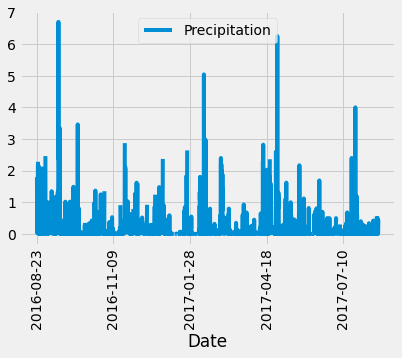

In [371]:
#figsize = (14,7)
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df = precipitation_df.sort_values("Date")
precipitation_df.plot()
plt.xlabel("Date")
plt.xticks(rotation='90')

In [126]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [372]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(Station).count()
number_stations

9

##### Question 1 -- number_stations2 ... how to print the value
# Question 2 --- How to create a sqllitte database ( search )
# Solution of some of activities 10.2 and 10.3 stu_chinook
#Return a contiguous flattened array. np.ravel(most_active_station_data_12_months)
number_stations2 = session.query(Station,func.sum(Station.id))
number_stations2

In [373]:
station_data = engine.execute("Select * from station Limit 10")
for s in station_data:
    print(s)
   

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [374]:
##### How can i do this using session querY
measurement_data = engine.execute("Select * from measurement Limit 12")
for m in measurement_data:
    print(m)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)


In [375]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs) )\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [238]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station_query = session.query(Measurement.station )\
.filter(Measurement.station == Station.station)\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.tobs).desc()).first()
type(active_stations)
#most_active_station2 = pd.DataFrame(most_active_station)
most_active_station = most_active_station_query[0]
most_active_station

'USC00519281'

In [376]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#most_active_station = 'USC00519281'
most_active_station_data=session.query(func.min(Measurement.tobs) ,func.max(Measurement.tobs) , func.avg(Measurement.tobs))\
.filter(Measurement.station == most_active_station).all()
most_active_station_data

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

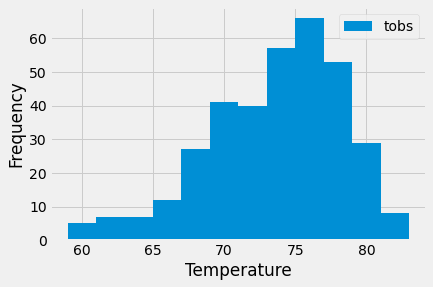

In [387]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#most_active_station
#recent_date
#begin_date
most_active_station_data_12_months =session.query(Measurement.tobs)\
.filter(Measurement.station == most_active_station)\
.filter(Measurement.date >= begin_date )\
.filter(Measurement.date <= recent_date).all()

most_active_station_data_12_months_df = pd.DataFrame(most_active_station_data_12_months)

##Return a contiguous flattened array.
#tobs_12_months = np.ravel(most_active_station_data_12_months)
#labels=['tobs']
#plt.hist(tobs_12_months)
#Pandas ways of plotting

most_active_station_data_12_months_df.plot.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')

# Close session

In [377]:
# Close Session
session.close()

In [378]:
last_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
last_year_date 

datetime.date(2016, 8, 23)

In [313]:


last_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
#last_year_date 

q= session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
order_by(Measurement.date).all()
q

[('2010-01-01', 70.0),
 ('2010-01-02', 62.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 75.0),
 ('2010-01-05', 74.0),
 ('2010-01-06', 76.0),
 ('2010-01-07', 69.0),
 ('2010-01-08', 66.0),
 ('2010-01-09', 70.0),
 ('2010-01-10', 75.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 60.0),
 ('2010-01-13', 61.0),
 ('2010-01-14', 68.0),
 ('2010-01-15', 64.0),
 ('2010-01-16', 66.0),
 ('2010-01-17', 67.0),
 ('2010-01-18', 70.0),
 ('2010-01-19', 67.0),
 ('2010-01-20', 67.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 60.0),
 ('2010-01-23', 75.0),
 ('2010-01-24', 75.0),
 ('2010-01-25', 65.0),
 ('2010-01-26', 75.0),
 ('2010-01-27', 69.0),
 ('2010-01-28', 67.0),
 ('2010-01-29', 66.0),
 ('2010-01-30', 69.0),
 ('2010-01-31', 72.0),
 ('2010-02-01', 67.0),
 ('2010-02-02', 65.0),
 ('2010-02-03', 64.0),
 ('2010-02-04', 67.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 68.0),
 ('2010-02-07', 69.0),
 ('2010-02-08', 66.0),
 ('2010-02-09', 69.0),
 ('2010-02-10', 61.0),
 ('2010-02-11', 71.0),
 ('2010-02-12', 70.0),
 ('2010-02-

In [301]:
most_active_station_data_12_months =session.query(Measurement.tobs)\
.filter(Measurement.station == most_active_station)\
.filter(Measurement.date >= begin_date )\
.filter(Measurement.date <= recent_date).all()

most_active_station_data_12_months_df = pd.DataFrame(most_active_station_data_12_months)
most_active_station_data_12_months_df 

""


In [380]:
last_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)
last_year_date 

datetime.date(2016, 8, 23)

In [381]:
s='2010-11-22'
min_max_avg_temp=session.query(func.min(Measurement.tobs) ,func.max(Measurement.tobs) , func.avg(Measurement.tobs)).\
filter(Measurement.date >= '2010-11-22' ).all()
min_max_avg_temp

[(53.0, 87.0, 73.15212934215921)]

In [382]:
min_max_avg_temp=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),\
    func.avg(Measurement.tobs))\
    .filter(Measurement.date >= '2010-11-22')\
    .filter(Measurement.date <= '2016-11-22').all()
min_max_avg_temp

[(53.0, 86.0, 73.08551607883817)]